In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import time
from sklearn import svm

from keras.models import Sequential
from keras.layers import Dense, Dropout , Lambda, Flatten

Using TensorFlow backend.


In [2]:
def tpr_weight_funtion(y_true,y_predict):
    d = pd.DataFrame()
    d['prob'] = list(y_predict)
    d['y'] = list(y_true)
    d = d.sort_values(['prob'], ascending=[0])
    y = d.y
    PosAll = pd.Series(y).value_counts()[1]
    NegAll = pd.Series(y).value_counts()[0]
    pCumsum = d['y'].cumsum()
    nCumsum = np.arange(len(y)) - pCumsum + 1
    pCumsumPer = pCumsum / PosAll
    nCumsumPer = nCumsum / NegAll
    TR1 = pCumsumPer[abs(nCumsumPer-0.001).idxmin()]
    TR2 = pCumsumPer[abs(nCumsumPer-0.005).idxmin()]
    TR3 = pCumsumPer[abs(nCumsumPer-0.01).idxmin()]
    return 0.4 * TR1 + 0.3 * TR2 + 0.3 * TR3

In [4]:
# 加载训练集
opr_train = pd.read_csv('../python_env01/data/new/operation_train_new.csv')
tra_train = pd.read_csv('../python_env01/data/new/transaction_train_new.csv')
tag = pd.read_csv('../python_env01/data/new/tag_train_new.csv', index_col='UID')

# 加载测试集
opr_test = pd.read_csv('../python_env01/data/new/operation_round1_new.csv')
tra_test = pd.read_csv('../python_env01/data/new/transaction_round1_new.csv')


/home/liao/code/python_env01/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3018: DtypeWarning: Columns (8) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [5]:
opr_test['UID'].unique().size

27887

In [103]:
tag.shape

(13422, 1)

In [29]:
opr.head()

,day,mode,success,time,os,version,device1,device2,device_code1,device_code2,device_code3,mac1,mac2,ip1,ip2,wifi,geo_code,ip1_sub,ip2_sub
UID,,,,,,,,,,,,,,,,,,,
10035,30,c8741ce15ceac2a4,1.0,17:51:50,102,7.0.9,49dd36968dbfadda,OPPO R11,ecb58082e0e9b8e2,00fa2e4ba95605ef,NaN,NaN,a8dc52f65085212e,55dd8936655c86f6,NaN,NaN,wskx,e58e48fb9215116e,NaN
16264,16,20a91b45ef8f8221,1.0,08:36:00,200,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,fc7fc47d6c93f554,NaN,NaN,NaN,3502c553ea2ac187
13162,8,b668e42707ee9c7b,0.0,18:09:57,102,7.0.5,630a1adff2a87007,MI MAX 2,1da225cb679a37eb,f18538156b8f9b57,NaN,a8dc52f65085212e,NaN,2147d925e7a8ba3c,NaN,NaN,NaN,3591678eca3f7a23,NaN
21392,23,c8741ce15ceac2a4,1.0,23:53:49,102,7.0.9,630a1adff2a87007,MI 5X,d0c285513b785609,a7e79e3c2c85c8c7,NaN,NaN,04a2d6c090518faa,c52efc665f0af581,NaN,4ff1553b1c96360e,wm4v,fdb5e20f6a6f2cd7,NaN
18599,26,acfaded7e04e7ba0,1.0,11:11:15,102,7.0.0,8399be6b80847240,NaN,27efd832595503f6,b6457e2264266257,NaN,NaN,1ab9dc3eae102aa6,0fe293bea342665a,NaN,NaN,NaN,f5009e2c6c13c80c,NaN


In [31]:
opr.loc[opr.index==10035]

,day,mode,success,time,os,version,device1,device2,device_code1,device_code2,device_code3,mac1,mac2,ip1,ip2,wifi,geo_code,ip1_sub,ip2_sub
UID,,,,,,,,,,,,,,,,,,,
10035,30,c8741ce15ceac2a4,1.0,17:51:50,102,7.0.9,49dd36968dbfadda,OPPO R11,ecb58082e0e9b8e2,00fa2e4ba95605ef,NaN,NaN,a8dc52f65085212e,55dd8936655c86f6,NaN,NaN,wskx,e58e48fb9215116e,NaN
10035,27,c8741ce15ceac2a4,1.0,09:01:41,102,7.0.9,49dd36968dbfadda,OPPO R11,ecb58082e0e9b8e2,60adaa223ad17ead,NaN,NaN,a8dc52f65085212e,afab1706b871ffab,NaN,64adc604e1123cdd,ws7g,8ef6f3daeffdbe3d,NaN
10035,27,c8741ce15ceac2a4,1.0,09:01:39,102,7.0.9,49dd36968dbfadda,OPPO R11,ecb58082e0e9b8e2,60adaa223ad17ead,NaN,NaN,a8dc52f65085212e,afab1706b871ffab,NaN,64adc604e1123cdd,ws7g,8ef6f3daeffdbe3d,NaN
10035,1,c8741ce15ceac2a4,1.0,20:43:44,102,7.0.5,49dd36968dbfadda,OPPO R11,ecb58082e0e9b8e2,00fa2e4ba95605ef,NaN,NaN,a8dc52f65085212e,97aeb123fafe5672,NaN,90a50ea267f6ef45,ws7g,77aa94e2b65e0d4e,NaN
10035,26,c8741ce15ceac2a4,1.0,12:12:01,102,7.0.9,49dd36968dbfadda,OPPO R11,ecb58082e0e9b8e2,00fa2e4ba95605ef,NaN,NaN,a8dc52f65085212e,9c9d49eddb6a59c3,NaN,90a50ea267f6ef45,ws7g,77aa94e2b65e0d4e,NaN
10035,3,c8741ce15ceac2a4,1.0,19:19:54,102,7.0.5,49dd36968dbfadda,OPPO R11,ecb58082e0e9b8e2,00fa2e4ba95605ef,NaN,NaN,a8dc52f65085212e,97aeb123fafe5672,NaN,90a50ea267f6ef45,ws7g,77aa94e2b65e0d4e,NaN
10035,30,c8741ce15ceac2a4,1.0,13:15:45,102,7.0.9,49dd36968dbfadda,OPPO R11,ecb58082e0e9b8e2,00fa2e4ba95605ef,NaN,NaN,a8dc52f65085212e,830e4b02f0bc0e18,NaN,NaN,ws7e,e58e48fb9215116e,NaN
10035,10,c8741ce15ceac2a4,1.0,14:06:28,102,7.0.5,49dd36968dbfadda,OPPO R11,ecb58082e0e9b8e2,00fa2e4ba95605ef,NaN,NaN,a8dc52f65085212e,47f70286272f2f0d,NaN,90a50ea267f6ef45,ws7g,77aa94e2b65e0d4e,NaN
10035,23,c8741ce15ceac2a4,1.0,21:31:38,102,7.0.9,49dd36968dbfadda,OPPO R11,ecb58082e0e9b8e2,00fa2e4ba95605ef,NaN,NaN,a8dc52f65085212e,1ca60c14d6ae442b,NaN,90a50ea267f6ef45,ws7g,77aa94e2b65e0d4e,NaN


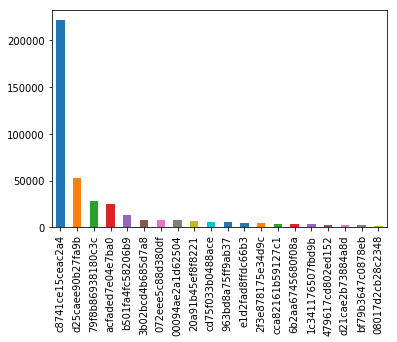

c8741ce15ceac2a4    221276
d25caee90b27fa9b     52361
79f8b86938180c3c     28560
acfaded7e04e7ba0     24988
b501fa4fc58206b9     13126
3b02bcd4b685d7a8      7830
072eee5c88d380df      7735
00094ae2a1d62504      7516
20a91b45ef8f8221      6715
cd75f033b0488ace      5922
Name: mode, dtype: int64

In [87]:
mode_counts = opr['mode'].value_counts()
mode_counts.head(20).plot.bar()
plt.show()
mode_counts.head(10)

有11979个用户

In [81]:
opr.shape

(424481, 20)

In [18]:
len(opr['mode'].unique())

76

有76种操作

In [22]:
opr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 424481 entries, 0 to 424480
Data columns (total 20 columns):
UID             424481 non-null int64
day             424481 non-null int64
mode            424481 non-null object
success         391250 non-null float64
time            424481 non-null object
os              424481 non-null int64
version         342182 non-null object
device1         342616 non-null object
device2         283232 non-null object
device_code1    279284 non-null object
device_code2    271064 non-null object
device_code3    62950 non-null object
mac1            34400 non-null object
mac2            244265 non-null object
ip1             337765 non-null object
ip2             44700 non-null object
wifi            119665 non-null object
geo_code        250435 non-null object
ip1_sub         337765 non-null object
ip2_sub         44700 non-null object
dtypes: float64(1), int64(3), object(16)
memory usage: 64.8+ MB


可以看到，有1个float型，3个int型， 16个str

In [23]:
opr.describe()

,UID,day,success,os
count,424481.000000,424481.000000,391250.000000,424481.000000
mean,16637.636599,16.294359,0.955591,120.345778
std,3852.893889,9.071168,0.206002,38.038885
min,10000.000000,1.000000,0.000000,101.000000
25%,13285.000000,8.000000,1.000000,102.000000
50%,16603.000000,16.000000,1.000000,102.000000
75%,20027.000000,24.000000,1.000000,103.000000
max,23421.000000,30.000000,1.000000,200.000000


由上面可知，4个数值型的字段，其中UID系识别字段；day系日期；success系分类字段，os也是分类字段

In [25]:
opr.os.value_counts()

102    280140
200     78821
103     62753
101      2068
104       400
107       297
105         2
Name: os, dtype: int64

In [12]:
print('Sum of tag:%s' % tag.Tag.sum())
print('Count of tag:%s, precent:%s' % (str(tag.shape), tag.Tag.sum()/tag.shape[0]))

Sum of tag:1528
Count of tag:(13422, 2), precent:0.1138429444196096


 只有11%的标签，还可以

下面先查看有多少数据，有多少用户

In [18]:
print('Opration Count:%s, user;%s' % (opr.shape[0], opr.UID.unique().shape[0]))
print('transaction Count:%s, user;%s' % (tra.shape[0], tra.UID.unique().shape[0]))

Opration Count:424481, user;11979
transaction Count:161965, user;13013


### 从以上数据可以看出，大部分用户是有操作行为和交易行为的

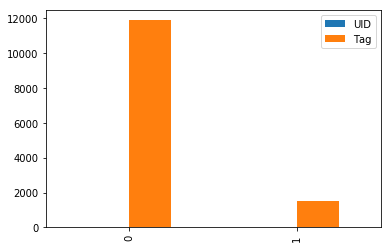

In [7]:
tag1 = tag.apply(pd.value_counts).fillna(0)
tag1 = tag1.head(2)
tag1.plot(kind='bar')

从上图可以直观地看到，标签为1的样本数大概只有一成。

In [18]:
tra_uid = pd.DataFrame(tra.UID)
tra_uid_vc = tra_uid.apply(pd.value_counts).fillna(0)
tra_uid_vc.describe()

,UID
count,13013.00000
mean,12.44640
std,43.26613
min,1.00000
25%,3.00000
50%,6.00000
75%,13.00000
max,4030.00000


这里可以看到，具有交易记录的用户数为13013。
平均每个用户只有12.4条交易记录。
交易数最小的用户只有1条，最多有4030条。

- 25%的用户不超过3条交易记录；
- 50%的用户不超过6条交易记录；
- 75%的用户不超过13条交易记录；

In [19]:
opr_uid = pd.DataFrame(opr.UID)
opr_uid_vc = opr_uid.apply(pd.value_counts).fillna(0)
opr_uid_vc.describe()

,UID
count,11979.000000
mean,35.435429
std,53.481092
min,1.000000
25%,9.000000
50%,18.000000
75%,39.000000
max,1299.000000


这里可以看到，具有操作记录的用户数为11979。平均每个用户有35.4条操作记录。操作数的标准差为53.5。操作数最小为1, 最多有1299条。

- 25%的用户不超过9条操作记录；
- 50%的用户不超过18条操作记录；
- 75%的用户不超过39条操作记录；

这是训练集的数据情况。注意，可能与测试不完全一样，但这个可以作为参考。假设操作数是服从正态分布，取平均值左右两边3个标准差大小的范围，应该可以覆盖99.73%的情况；取两个标准差，也可以覆盖95.45%的情况。其它情况可以认为是异常值。

## mac地址

In [47]:
opr.loc[:, ['mac1', 'mac2']].describe()

,mac1,mac2
count,34400,244265
unique,3538,7197
top,a8dc52f65085212e,a8dc52f65085212e
freq,12040,88503


mac1只有3.5万条是有记录的，空值太多，直接删除。mac2继续观察

In [49]:
opr.loc[:, 'mac2'].value_counts()

a8dc52f65085212e    88503
6654f8e42452faf8      734
3b34a667e4d2e60e      519
f365a9f04e22c598      432
5a316e429008aa2e      394
a5055157f44e5911      334
0b033e3f416f5ea1      328
9316963119763371      301
cee02dc4495acd6c      290
1932571238ac50e3      284
5d0d6a852a9b6507      282
bf4c23bfa6c28284      277
bd733d649b92d737      255
1cc1df336a297359      249
74f7e0d006808b2d      243
bccf40df8b7463f6      240
830d7c14fb2ae36f      232
37df4227d97721c0      231
4745d31683f4162b      227
0772b2c64a5b60ba      227
19233e99e0dac7de      221
c3947db4a39c0daa      221
0230a03d5028727e      219
d6aae74245784f47      218
1c5b8b50c4400b3c      212
6c8811cb08f80eeb      205
0ac16fd5ef81f95b      204
a6f29d0b457ae6c3      203
c327ca20d3c6a6ea      203
fabcf65a173580ca      199
                    ...  
bca15c66491d08ce        1
b7f036afd2172f2e        1
487078389b73fa22        1
7e0bcaffa0539cab        1
30d161d27755cad4        1
d5e9620250f08064        1
ef2695b394802d5d        1
942037d9a059

只有一个MAC2占比大，说明这些用户基本是同一个地区的。

## 地理位置

In [54]:
opr['geo_code'].describe()

count     250435
unique      3060
top         ws0e
freq        3224
Name: geo_code, dtype: object

有25万条记录，还可以使用

In [58]:
a = opr['geo_code'].value_counts()
a[a> 100]

ws0e    3224
wmd6    2790
wtsk    1747
ws06    1609
wwc2    1461
wmd7    1422
wts4    1249
wme1    1235
wmr8    1210
ws07    1130
wt02    1122
wq3v    1103
wtg7    1097
wsbq    1089
wtw3    1084
wtq3    1073
wm4u    1023
wm4x     990
wtg1     988
wm3y     984
wt7j     966
wm48     936
wxs8     918
wx4g     881
wxrt     834
wmr2     801
wsgv     789
wkz6     740
wqju     740
wskm     737
        ... 
wkn7     106
wskt     106
ws2g     106
wts7     105
wxqx     105
wtje     105
wwev     105
wqjt     105
wqej     105
ws72     105
wkhc     104
ww47     104
wkkv     104
yb31     104
ww0f     103
ws0v     103
wxrj     103
vbh7     103
wtn6     102
wt2x     102
wtnm     102
whrz     102
wmmn     102
wkku     101
ws3k     101
ww4v     101
wsk5     101
wkpw     101
wkdx     101
ww0p     101
Name: geo_code, Length: 645, dtype: int64

有600多个位置都是有上百个用户使用的。这些用户很分散，可能是移动端的用户。

暂时先计一个不同地理位置的数量。还未想好有什么好的用法。

## 2. 数据预处理，生成特征

## 操作特征
- 操作的日期数
- 操作记录条数
- 操作频繁：操作记录数/操作日期数
- c8741ce15ceac2a4 这一类操作的记录数（还要查看数量为前10的操作类型与标签的关系）
- 操作成功的记录数
- 每个小时的操作的记录数（24个字段）
- 操作系统的类型数量
- 每个操作系统的记录数（每个操作系统对应一个特征）
- 每个手机牌子的记录数（每个牌子对应一个特征）
- mac地址数量
- 地理位置数量

In [29]:
# 处理测试集数据
#opr = pd.concat([opr_test, opr_train])
# 处理训练集
file_name = '../python_env01/data/operation_feature01_train.csv'
opr = opr_train

train = pd.DataFrame()
train['day_nunique'] = opr.groupby('UID')['day'].nunique()
train['record_count'] = opr.groupby('UID').count()['day']
train['opr_fre'] = train['record_count'] / train['day_nunique']
train['mac2_num'] = opr.groupby('UID')['mac2'].nunique()
train['geo_num'] = opr.groupby('UID')['geo_code'].nunique()
# mode
'''c8741ce15ceac2a4
d25caee90b27fa9b
79f8b86938180c3c
acfaded7e04e7ba0
b501fa4fc58206b9
072eee5c88d380df
00094ae2a1d62504
20a91b45ef8f8221
cd75f033b0488ace'''
#mode = opr[['UID','mode','success','time','os','device2']]
opr.loc[:,'mode_code'] = opr['mode'].map({'c8741ce15ceac2a4':1, 
                        'd25caee90b27fa9b':2,
                        '79f8b86938180c3c':3,
                        'acfaded7e04e7ba0':4,
                        'b501fa4fc58206b9':5,
                        '072eee5c88d380df':6,
                        '00094ae2a1d62504':7,
                        '20a91b45ef8f8221':8,
                        'cd75f033b0488ace':9,
                       })
opr['mode_code'] = opr['mode_code'].fillna(0).astype(int)
mode_type = opr['mode_code'].unique()
mode_type.sort()
# 设置mode name
for i in mode_type:
    train['mode_%s' % i] = 0

# 设置time name
for i in range(0, 24):
    train['time_%02d' % i] = 0
# 设置os name
for i in opr['os'].value_counts().index.values:
    train['os_%s' % i] = 0
# 设置phone name
phone_name = ['IPHONE', 'VIVO', 'OPPO', 'HUAWEI', 'MI', 'REDMI', 'MHA-AL00', 'HM', 'ZTE', 'other']
phone_map = {None:-1,'IPHONE':1, 'VIVO':2, 'OPPO':3, 'HUAWEI':4, 'MI':5, 'REDMI':6, 'MHA-AL00':7, 'HM':8, 'ZTE':9}
opr.loc[:, 'phone'] = opr.loc[:, 'device2'].str.split(n=1, expand=True).iloc[:, 0].map(phone_map)
opr['phone'] = opr['phone'].fillna(0).astype(int)
#display(opr.loc[:10, ['device2','phone']])
phone_type = opr['phone'].unique()
phone_type.sort()
for i in phone_type:
    train['phone_%s' % int(i)] = 0


for name,group in opr.groupby('UID'):
    # 各种操作的记录数
    model_vc = group['mode_code'].value_counts()
    mode_col_name = ['mode_%s' % i for i in model_vc.index]
    train.loc[name, mode_col_name] = model_vc.values
    
    # 操作成功的记录数
    train.loc[name, 'success_num'] = group['success'].sum()
    
    # 各小时的操作数
    time_vc = group['time'].str[:2].value_counts()
    time_col_name = ['time_%02d' % int(i) for i in time_vc.index]
    train.loc[name, time_col_name] = time_vc.values
    
    # 操作系统数
    os_vc = group['os'].value_counts()
    os_col_name = ['os_%s' % i for i in os_vc.index.values]
    train.loc[name, os_col_name] = os_vc.values
    
    # phone name
    # 这个字段要先预处理，把不关心的全部转换
    phone = group.loc[group['phone'] >= 0, 'phone']
    phone_vc = phone.value_counts()
    phone_col_name = ['phone_%s' % i for i in phone_vc.index]
    train.loc[name, phone_col_name] = phone_vc.values
    
    #break
    
#mode.groupby.value_counts()
train = train.fillna(0).astype(int)
#display(train)
train.to_csv(file_name)
print('shape ', train.shape)

shape  (29728, 58)


In [6]:
train.head()

,day_nunique,record_count,opr_fre,mac2_num,geo_num,mode_0,mode_1,mode_2,mode_3,mode_4,...,phone_1,phone_2,phone_3,phone_4,phone_5,phone_6,phone_7,phone_8,phone_9,success_num
UID,,,,,,,,,,,,,,,,,,,,,
10000,2,9,4,0,0,1,6,2,0,0,...,7,0,0,0,0,0,0,0,0,9
10001,8,67,8,1,3,3,34,9,17,0,...,0,0,0,39,0,0,0,0,0,49
10002,1,11,11,2,1,5,3,3,0,0,...,0,0,0,0,0,0,0,0,0,11
10003,1,15,15,1,0,0,14,1,0,0,...,0,14,0,0,0,0,0,0,0,15
10004,6,34,5,1,1,5,21,1,0,3,...,0,0,0,0,0,0,33,0,0,32


In [95]:
opr.loc[opr['UID'] == 10000]

,UID,day,mode,success,time,os,version,device1,device2,device_code1,...,mac1,mac2,ip1,ip2,wifi,geo_code,ip1_sub,ip2_sub,mode_code,phone
87507,10000,13,c8741ce15ceac2a4,1.0,14:20:56,103,7.0.5,aca4977fbe8741e1,IPHONE 5,NaN,...,NaN,NaN,31599eec867ba9c7,NaN,NaN,NaN,ee08d48e73120da4,NaN,1,1
96940,10000,26,c8741ce15ceac2a4,1.0,12:23:48,103,7.0.7,aca4977fbe8741e1,IPHONE 5,NaN,...,NaN,NaN,34c715882de1a508,NaN,NaN,NaN,1e3ea9498c461cbf,NaN,1,1
150480,10000,26,d25caee90b27fa9b,1.0,12:24:21,103,7.0.7,aca4977fbe8741e1,NaN,NaN,...,NaN,NaN,34c715882de1a508,NaN,NaN,NaN,1e3ea9498c461cbf,NaN,2,-1
168206,10000,26,c8741ce15ceac2a4,1.0,12:23:48,103,7.0.7,aca4977fbe8741e1,IPHONE 5,NaN,...,NaN,NaN,34c715882de1a508,NaN,NaN,NaN,1e3ea9498c461cbf,NaN,1,1
196361,10000,26,c8741ce15ceac2a4,1.0,12:23:48,103,7.0.7,aca4977fbe8741e1,IPHONE 5,NaN,...,NaN,NaN,34c715882de1a508,NaN,NaN,NaN,1e3ea9498c461cbf,NaN,1,1
216744,10000,13,270ca3ca8f0d1126,1.0,14:22:59,103,7.0.5,aca4977fbe8741e1,IPHONE 5,NaN,...,NaN,NaN,31599eec867ba9c7,NaN,NaN,NaN,ee08d48e73120da4,NaN,0,1
307385,10000,13,c8741ce15ceac2a4,1.0,14:20:56,103,7.0.5,aca4977fbe8741e1,IPHONE 5,NaN,...,NaN,NaN,31599eec867ba9c7,NaN,NaN,NaN,ee08d48e73120da4,NaN,1,1
339411,10000,26,d25caee90b27fa9b,1.0,12:24:01,103,7.0.7,aca4977fbe8741e1,NaN,NaN,...,NaN,NaN,34c715882de1a508,NaN,NaN,NaN,1e3ea9498c461cbf,NaN,2,-1
420183,10000,13,c8741ce15ceac2a4,1.0,14:20:56,103,7.0.5,aca4977fbe8741e1,IPHONE 5,NaN,...,NaN,NaN,31599eec867ba9c7,NaN,NaN,NaN,ee08d48e73120da4,NaN,1,1


# 交易行为分析

## 交易特征提取

In [4]:
tra.shape

(161965, 27)

In [5]:
tra.head()

,UID,channel,day,time,trans_amt,amt_src1,merchant,code1,code2,trans_type1,...,ip1,bal,amt_src2,acc_id2,acc_id3,geo_code,trans_type2,market_code,market_type,ip1_sub
0,19092,102,30,11:48:47,1459,acdbdb842ac20f1e,abc6bc660561e0eb,NaN,NaN,26bcf43a19df14c8,...,a664530c1fb20abe,1007,9fefed0a981dcb7a,NaN,NaN,wsbq,102.0,2ecf94369847c748,1.0,45f4ca1f4e9b9cb7
1,13465,140,23,16:58:03,725,4d7831c6f695ab19,7a87b1aa20972d48,NaN,NaN,c2f2023d279665b2,...,52abe1e300a8aa10,100,NaN,NaN,NaN,wte7,105.0,NaN,NaN,2b416f1d7e89ad3b
2,13713,140,22,09:56:39,127,c5fc631370cabc0d,cfd035fc7e0a53b2,NaN,NaN,c2f2023d279665b2,...,e4c132d02ff6c095,100,NaN,NaN,NaN,ws7n,105.0,NaN,NaN,ff71a556d86c4b8f
3,22703,140,1,18:11:45,99317,a571c7fda8b7df37,c71c876b8979028e,NaN,NaN,c2f2023d279665b2,...,e1c78a56cc9dfc8b,100,fbf6bf3c8927414c,NaN,NaN,wqj6,NaN,NaN,NaN,cf1527a0b4173e8f
4,17816,140,22,13:04:02,3361,c5fc631370cabc0d,6628f5ca013e3582,NaN,NaN,c2f2023d279665b2,...,abb6b4b8f15be6d6,100,NaN,NaN,NaN,NaN,105.0,NaN,NaN,cbc62c2b1cb7deb9


In [6]:
tra.describe()

,UID,channel,day,trans_amt,bal,trans_type2,market_type
count,161965.000000,161965.000000,161965.000000,1.619650e+05,1.619650e+05,151013.000000,20536.000000
mean,16727.941259,121.960238,17.001828,5.182343e+04,6.757490e+04,103.612404,1.447117
std,3800.764764,18.911217,9.137898,6.191897e+05,8.147064e+05,1.400576,0.497208
min,10000.000000,102.000000,1.000000,1.020000e+02,1.000000e+02,102.000000,1.000000
25%,13456.000000,102.000000,9.000000,6.430000e+02,1.000000e+02,102.000000,1.000000
50%,16946.000000,140.000000,17.000000,2.818000e+03,1.000000e+02,104.000000,1.000000
75%,19978.000000,140.000000,25.000000,5.672000e+03,1.000000e+02,105.000000,2.000000
max,23421.000000,140.000000,30.000000,1.110691e+08,3.177177e+07,105.000000,2.000000


In [12]:
tra['ip1_sub'].value_counts()[:13]

72309d88abb9b916    3612
d212bf8069071714    1753
b8854c4e851ae095    1012
710c83a414ce874e     707
ace49c4dd8733686     553
933cd147f9d087e5     505
0c9b4cef157653a9     364
77aa94e2b65e0d4e     357
ee2a277f07c7ac81     318
7661c9041bbe683c     294
b40238432768d69d     291
87f07623623e49e9     229
0175bd0e6e4df5ca     223
Name: ip1_sub, dtype: int64

In [10]:
tra['ip1_sub'].value_counts()[:13].sum() / tra['ip1_sub'].value_counts().sum()

0.07700133384577125

In [5]:
tra['market_type'].value_counts()

1.0    11354
2.0     9182
Name: market_type, dtype: int64

In [3]:
tra['trans_type2'].value_counts()

105.0    68242
102.0    61949
104.0    17946
103.0     2876
Name: trans_type2, dtype: int64

In [11]:
tra['merchant'].value_counts()
# 商户存在长尾，可以把商户的长尾截断，把头部作为特征

3bd5cf7c40962299    20534
e36d1d861d5fc9ec    10088
d8babe2d19fa0c08     9170
1f72814f76a984fa     5301
c71c876b8979028e     5025
3f6d3d0f42519ea4     3954
8f57527418b3f457     2013
0e90f47392008def     2004
fa18843382c90848     2001
f25bb3986a5a1d6d     1763
5776870b5747e14e     1376
0bdfe811a0e60e0f     1279
e1bad078cf58a817     1274
ad0aa55c2ea8ff76     1270
1e70ea89a4cbb3fe     1011
a9d68a7b984ad793      999
651d274bee1947c9      907
41d64abe28baedf2      810
e3327c2985f2d393      647
c6dfb46506a4d39b      633
4bca6018239c6201      604
0eb9708880414422      537
db00fc053d5261f2      509
2b2e7046145d9517      454
0b5b36b39b5cb657      447
8094cb789741f0f1      444
7051de5689e83caa      414
8f2ffbe50ca20aac      395
a37e9f90d6cebe66      332
a18cb3d84b9ec04c      262
                    ...  
d823fba06d83d202        1
923e624be102ed85        1
e29a565fc1bf49ce        1
b60896d8f270fe1f        1
c968149011b171e4        1
51fe3b85f6d9ccb5        1
af520b290563bff7        1
897a30699eb8

In [10]:
tra['amt_src1'].value_counts()

155c9e1c32bd0fa2    50561
c5fc631370cabc0d    28738
4d7831c6f695ab19    25464
f29829bc82459191    11774
9451ef3c5a0d6807    11444
acdbdb842ac20f1e    11348
a571c7fda8b7df37     8504
992d3ce08a4ca702     7130
27c42480134c0d02     2442
8c9987909b3e95a4     2014
b3acdf321be07351      517
767001914a988cfb      466
b0a5496f0db7f70a      447
8c753ae7afb60e61      414
3045dd7701f3e263      185
8576ce2e7ab65ac2      136
0b747ef141d49c8c      108
9a1fad6202fd1a24       64
d7de70fc65292e41       56
79b1dd31895a6278       46
d4f7a3699ef02458       46
d46a2a9577fb52c3       19
47b415a384665f45       15
4ec06e4d12f8560d       12
295eadbc19cddb04        7
41c767468d03b4ac        6
f2500fa92c7e39b9        2
Name: amt_src1, dtype: int64

In [8]:
tra['channel'].value_counts()

140    84588
102    76180
119     1056
106      141
Name: channel, dtype: int64

In [9]:
tra['day'].value_counts()
# 这个数据肯定与星期有关，每7天就会有一次交易高峰

22    10942
15    10445
29    10356
8     10164
1      9009
25     8789
30     8349
16     7899
27     7831
2      6435
28     5999
9      5969
26     5944
23     4997
20     3886
17     3784
5      3772
18     3750
19     3744
21     3389
12     3128
14     2860
24     2809
7      2745
6      2697
13     2678
11     2493
3      2454
10     2385
4      2263
Name: day, dtype: int64

## 交易特征
- 平台可以展开
- 交易记录数
- 交易日期，前3-5个可以展开
- 交易金额
- 资金类型前10个展开
- 热门商户可以展开，应该分桶后再展开
- 2种交易类型展开
- 营销活动类型展开
- 观察坏人使用的IP是否集中


In [24]:
tra['merchant'].value_counts()[:10]

3bd5cf7c40962299    34817
e36d1d861d5fc9ec    17052
11382423588e20f5    15522
d8babe2d19fa0c08    15331
c71c876b8979028e    10454
3f6d3d0f42519ea4     7830
1f72814f76a984fa     6359
fc9fc9836e7cf3a1     5771
1bf98752b86b30a1     5123
0e90f47392008def     4851
Name: merchant, dtype: int64

In [30]:
# 处理测试集数据
#tra = pd.concat([tra_test, tra_train])
# 训练集
file_name = '../python_env01/data/transaction_feature01_train.csv'
tra = tra_train

tra_fea = pd.DataFrame()
# set channel name
for i in tra['channel'].value_counts().index.values:
    tra_fea['channel_%s' % i] = 0
# set day name
day_type= tra['day'].value_counts().index.values
day_type.sort()
for i in day_type:
    tra_fea['day_%s' % i] = 0
# set amt src1
amt_src1_map = {
'155c9e1c32bd0fa2':1,
'c5fc631370cabc0d':2,
'4d7831c6f695ab19':3,
'f29829bc82459191':4,
'9451ef3c5a0d6807':5,
'acdbdb842ac20f1e':6,
'a571c7fda8b7df37':7,
'992d3ce08a4ca702':8,
'27c42480134c0d02':9,
'8c9987909b3e95a4':10,
}
tra.loc[:, 'amt_src1_map'] = tra.loc[:, 'amt_src1'].map(amt_src1_map)
tra['amt_src1_map'] = tra['amt_src1_map'].fillna(0).astype(int)
#display(opr.loc[:10, ['device2','phone']])
amt_src1_map_type = tra['amt_src1_map'].unique()
amt_src1_map_type.sort()
for i in amt_src1_map_type:
    tra_fea['amt_src1_%s' % int(i)] = 0
# set merchant
merchant_map = {
'3bd5cf7c40962299':1,
'e36d1d861d5fc9ec':2,
'd8babe2d19fa0c08':3,
'1f72814f76a984fa':4,
'c71c876b8979028e':5,
'3f6d3d0f42519ea4':6,
'8f57527418b3f457':7,
'0e90f47392008def':8,
'fa18843382c90848':9,
'f25bb3986a5a1d6d':10,
'5776870b5747e14e':11,
'0bdfe811a0e60e0f':12,
'e1bad078cf58a817':13,
'ad0aa55c2ea8ff76':14,
'1e70ea89a4cbb3fe':15
}
tra.loc[:, 'merchant_map'] = tra.loc[:, 'merchant'].map(merchant_map)
tra['merchant_map'] = tra['merchant_map'].fillna(0).astype(int)
merchant_map_type = tra['merchant_map'].unique()
merchant_map_type.sort()
for i in merchant_map_type:
    tra_fea['merchant_%s' % i] = 0
# set trans_type1
trans_type1_map = {
'c2f2023d279665b2':1,
'6d55c54c8b1056fb':2,
'61bfb66c928f36ac':3,
'26bcf43a19df14c8':4,
'e0d7b8768da99dd4':5,
'd9c417304a5ae70c':6,
'9d7dd7b80e806024':7,
'a19e7a8951e54c06':8,
'ced62357ad496957':9,
'eb8d10591677bbe1':10,
'4adc3de71fe1a83c':11,
'85bced5214d33ad2':12,
'e903cf2a79b83d37':13,
'fd4d2d1006a95637':14,
'3f469aa3836e71cb':15,
}
tra.loc[:, 'trans_type1_map'] = tra.loc[:, 'trans_type1'].map(trans_type1_map)
trans_types1_type = tra['trans_type1_map'].unique()
trans_types1_type.sort()
for i in trans_types1_type:
    tra_fea['trans_types1_%s' % i] = 0
# set trans_type2
tra['trans_type2'] = tra['trans_type2'].fillna(0)
trans_types2_type = tra['trans_type2'].unique()
trans_types2_type.sort()
for i in trans_types2_type:
    tra_fea['trans_types2_%s' % int(i)] = 0
# set market_type
tra['market_type'] = tra['market_type'].fillna(0)
market_type_type = tra['market_type'].unique()
market_type_type.sort()
for i in market_type_type:
    tra_fea['market_type_%s' % int(i)] = 0
    
# 生成特征
for name,group in tra.groupby('UID'):
    # 交易平台
    channel_vc = group['channel'].value_counts()
    channel_col_name = ['channel_%s' % i for i in channel_vc.index.values]
    tra_fea.loc[name, channel_col_name] = channel_vc.values
    # 交易记录
    tra_fea.loc[name, 'tra_count'] = group.shape[0]
    # 交易日期
    day_vc = group['day'].value_counts()
    day_col_name = ['day_%s' % i for i in day_vc.index.values]
    tra_fea.loc[name, day_col_name] = day_vc.values
    # 交易总额
    tra_fea.loc[name, 'trans_amt_sum'] = group['trans_amt'].sum()
    # 交易额标准差
    tra_fea.loc[name, 'trans_amt_std'] = group['trans_amt'].std()
    # 资金类型1
    amt_src1_vc = group['amt_src1_map'].value_counts()
    as_col_name = ['amt_src1_%s' % i for i in amt_src1_vc.index.values]
    tra_fea.loc[name, as_col_name] = amt_src1_vc.values
    # 商户标识
    merchant_vc = group['merchant_map'].value_counts()
    merchant_col_name = ['merchant_%s' % i for i in merchant_vc.index.values]
    tra_fea.loc[name, merchant_col_name] = merchant_vc.values
    # 交易类型1
    trans_type1_vc = group['trans_type1_map'].value_counts()
    trans_type1_col_name = ['trans_types1_%s' % i for i in trans_type1_vc.index.values]
    tra_fea.loc[name, trans_type1_col_name] = trans_type1_vc.values
    # 交易类型2
    trans_type2_vc = group['trans_type2'].value_counts()
    trans_type2_col_name = ['trans_types2_%s' % int(i) for i in trans_type2_vc.index.values]
    tra_fea.loc[name, trans_type2_col_name] = trans_type2_vc.values
    # 营销活动类型
    market_type_vc = group['market_type'].value_counts()
    market_type_col_name = ['market_type_%s' % int(i) for i in market_type_vc.index.values]
    tra_fea.loc[name, market_type_col_name] = market_type_vc.values
    #break
    
tra_fea.index.name = 'UID'
tra_fea = tra_fea.fillna(0)
tra_fea = tra_fea.astype('int')
tra_fea.to_csv(file_name)
print('shape of tra fea:', tra_fea.shape)

shape of tra fea: (30542, 88)


In [31]:
data = pd.read_csv('../python_env01/data/transaction_feature01_train_test.csv', index_col='UID')
data['trans_types1_nan'].sum()

0

In [40]:
tra.loc[tra['UID'] < 10001, :]

,UID,channel,day,time,trans_amt,amt_src1,merchant,code1,code2,trans_type1,...,acc_id2,acc_id3,geo_code,trans_type2,market_code,market_type,ip1_sub,amt_src1_map,merchant_map,trans_type1_map
90698,10000,140,26,12:23:56,5536,f29829bc82459191,88aa547576f43f85,NaN,NaN,c2f2023d279665b2,...,NaN,NaN,NaN,105.0,NaN,NaN,1e3ea9498c461cbf,4,0,1
134052,10000,140,26,12:24:17,5536,f29829bc82459191,88aa547576f43f85,NaN,NaN,c2f2023d279665b2,...,NaN,NaN,NaN,105.0,NaN,NaN,1e3ea9498c461cbf,4,0,1


# 构造建模数据

### 加载特征数据

In [32]:
trans = pd.read_csv('../python_env01/data/transaction_feature01_train.csv', index_col='UID')
oper = pd.read_csv('../python_env01/data/operation_feature01_train.csv', index_col='UID')
data = pd.concat([trans, oper], axis=1)

In [34]:
# 加载验证集数据
trans_verify = pd.read_csv('../python_env01/data/transaction_feature01_test.csv', index_col='UID')
oper_verity = pd.read_csv('../python_env01/data/operation_feature01_test.csv', index_col='UID')
verify_data = pd.concat([trans_verify, oper_verity], axis=1)

In [25]:
tag.shape

(13422, 1)

In [35]:
print('shape of train:%s, oper:%s' % (str(tra_train.shape), str(opr_train.shape)))

print('shape of test trans:%s, oper:%s' % (str(trans_verify.shape), str(oper_verity.shape)))
print('shape of test data:', verify_data.shape)

print('shape of all:%s, oper:%s' % (str(trans.shape), str(oper.shape)))
print('shape of all data:', data.shape)


shape of train:(264654, 30), oper:(1460843, 22)
shape of test trans:(13115, 85), oper:(10128, 58)
shape of test data: (13434, 143)
shape of all:(30542, 88), oper:(29728, 58)
shape of all data: (31179, 146)


In [25]:
data.describe()

,channel_140,channel_102,channel_118,channel_119,channel_106,day_1,day_2,day_3,day_4,day_5,...,phone_2,phone_3,phone_4,phone_5,phone_6,phone_7,phone_8,phone_9,success_num,y
count,60643.000000,60643.000000,60643.000000,60643.000000,60643.000000,60643.000000,60643.000000,60643.000000,60643.000000,60643.000000,...,57615.000000,57615.000000,57615.000000,57615.000000,57615.000000,57615.000000,57615.000000,57615.000000,57615.000000,31179.000000
mean,4.832479,2.134492,0.152664,0.028462,0.002523,0.336181,0.236350,0.101858,0.093910,0.134377,...,6.705893,6.567179,1.785611,1.922485,1.713165,0.528907,0.182539,0.381185,50.054396,0.137432
std,15.708874,12.167145,1.466054,0.538006,0.128582,1.285922,1.033885,0.833524,0.701689,0.878113,...,31.856199,31.398283,17.284528,18.879854,17.417310,9.643359,4.160468,8.332096,92.788931,0.344309
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,12.000000,0.000000
50%,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,25.000000,0.000000
75%,6.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000
max,3017.000000,1090.000000,208.000000,32.000000,20.000000,165.000000,52.000000,109.000000,50.000000,71.000000,...,1612.000000,1764.000000,1189.000000,1173.000000,1465.000000,622.000000,393.000000,1102.000000,2481.000000,1.000000


In [81]:
print('label rate with null:')
print(data['y'].value_counts())
print(data['y'].value_counts() / data.shape[0])

label rate with null:
0    11894
1     1528
Name: y, dtype: int64
0    0.886157
1    0.113843
Name: y, dtype: float64


In [37]:
data['trans_types1_nan']

KeyError: 'trans_types1_nan'

In [36]:
data2 = data.dropna()
# trans_types1_nan 也是全0
data2 = data2.drop('trans_types1_nan', axis=1)
data2 = data2.drop('phone_-1', axis=1)
print('shape of data2:', data2.shape)
display(data2.describe())
#print('after drop null')
#print(data2['y'].value_counts())
#print(data2['y'].value_counts() / data2.shape[0])

KeyError: "['trans_types1_nan'] not found in axis"

In [117]:
verify_data2 = verify_data.dropna()
verify_data2 = verify_data2.drop('phone_-1', axis=1)
print('shape of verify data2:', verify_data2.shape)

shape of verify data2: (9809, 142)


In [10]:
data['y'] = tag

### 预处理

1. 消除单位, 缩放到0-1

In [11]:
data3 = (data2 - data2.min()) / (data2.max() - data2.min())

### 组成训练集

In [12]:
data3['y'] = tag

In [13]:
train = data3.loc[data3['y'].notna()]
test = data3.loc[data3['y'].isna()]
test = test.iloc[:, :-1]
X_train,X_test,y_train,y_test = train_test_split(train.iloc[:, :-1], 
                                                 train.iloc[:, -1],test_size=0.1,random_state=0)

In [70]:
X_train = train.iloc[:, :-1]
y_train = train.iloc[:, -1]

X_test = test

In [71]:
print('shape of train X:%s, y:%s' % (str(X_train.shape), str(y_train.shape)))
print('shape of test X:', X_test.shape)

shape of train X:(11570, 145), y:(11570,)
shape of test X: (9809, 145)


In [28]:
print('shape of train:%s' % str(X_train.shape))
print('shape of test:%s' % str(test.shape))

shape of train:(26181, 146)
shape of test:(26790, 146)


In [27]:
X_train.head()

,channel_140,channel_102,channel_118,channel_119,channel_106,day_1,day_2,day_3,day_4,day_5,...,phone_1,phone_2,phone_3,phone_4,phone_5,phone_6,phone_7,phone_8,phone_9,success_num
UID,,,,,,,,,,,,,,,,,,,,,
64381,0.000663,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,...,0.016194,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.009674
14151,0.000663,0.000917,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,...,0.000000,0.000000,0.001701,0.0,0.0,0.0,0.0,0.0,0.0,0.002418
63818,0.000994,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,...,0.000000,0.013648,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.008867
16088,0.027842,0.018349,0.0,0.0,0.0,0.0,0.0,0.036697,0.1,0.070423,...,0.000000,0.060174,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.046352
59754,0.003646,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,...,0.000000,0.007444,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.015316


In [58]:
for name in train.columns.values:
    df = train.loc[train[name].isna()]
    if not df.empty:
        print('name:', name)
        display(df[name].head())

name: trans_types1_nan


UID
10000   NaN
10001   NaN
10002   NaN
10003   NaN
10004   NaN
Name: trans_types1_nan, dtype: float64

In [189]:
X = train.iloc[:, :-1]
y = train.iloc[:, -1]

In [191]:
mean_px = X_train.mean().astype(np.float32)
std_px = X_train.std().astype(np.float32)

def standardize(x): 
    return (x-mean_px)/std_px

# 建模

In [157]:
import keras.backend as K

def tpr(y_true, y_pred):
    
    return K.mean(y_pred)

In [14]:
# LR
start = time.time()
lr_clf = LogisticRegression(random_state=0, solver='lbfgs',
                            multi_class='multinomial', class_weight={0:5,1:1})
lr_clf.fit(X_train, y_train)
y_pred = lr_clf.predict_proba(X_test)
print('TPR:%s' % tpr_weight_funtion(y_test, y_pred[:, 1]))
end = time.time()
print('total time:%-2f' % (end - start))

TPR:0.35555555555555557
total time:1.783338


/home/liao/code/python_env01/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:757: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


In [72]:
# LR 提交成绩
lr_clf = LogisticRegression(random_state=0, solver='lbfgs',
                            multi_class='multinomial', class_weight={0:5,1:1})
lr_clf.fit(X_train, y_train)
y_pred = lr_clf.predict_proba(X_test)

y_pred.

In [80]:
result = pd.DataFrame(index=X_test.index)
result['Tag'] = y_pred[:, 1]
result.to_csv('../python_env01/data/submit.csv')

In [81]:
result.shape

(9809, 1)

In [77]:
X_test.head()

,channel_140,channel_102,channel_119,channel_106,day_1,day_2,day_3,day_4,day_5,day_6,...,phone_1,phone_2,phone_3,phone_4,phone_5,phone_6,phone_7,phone_8,phone_9,success_num
UID,,,,,,,,,,,,,,,,,,,,,
30000,0.000331,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.005784,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.004434
30001,0.002320,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.010204,0.0,0.0,0.0,0.0,0.0,0.0,0.006449
30002,0.000331,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.004434
30003,0.000331,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.006449
30005,0.000994,0.000917,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.004434


In [180]:
# 多层感知机
# fix random seed for reproducibility
seed = 7
np.random.seed(seed)

# create model
model = Sequential()
model.add(Lambda(standardize,input_shape=(57,)))
model.add(Dense(12, input_dim=58, init='uniform', activation='relu')) 
model.add(Dense(16, init='uniform', activation='relu'))
model.add(Dense(16, init='uniform', activation='relu'))
model.add(Dense(8, init='uniform', activation='relu'))
model.add(Dense(1, init='uniform', activation='sigmoid'))

# Compile model
model.compile(loss='binary_crossentropy',
              optimizer='adam', metrics=['accuracy']) # Fit the model
model.fit(X_train, y_train, validation_split=0.33, nb_epoch=10, batch_size=10)

ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().